In [40]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
import seaborn as sns
from sklearn import datasets
from scipy.stats import linregress
from matplotlib.dates import DateFormatter
%matplotlib notebook

In [41]:
# Read CSV
cases_data = pd.read_csv('covid19cases_test.csv')
vaccine_data= pd.read_csv('covid19vaccinesbycounty.csv')


In [42]:
Ca_counties_vax_demo_csv = "covid19vaccinesbycountybydemographic.csv"

ca_counties_vaxdemo_df = pd.read_csv(Ca_counties_vax_demo_csv, encoding="utf-8")
ca_counties_vaxdemo_df['administered_date']=pd.to_datetime(ca_counties_vaxdemo_df['administered_date'])
ca_counties_vaxdemo_df.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
0,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-26,276.0,12830.0,64.0,2949.0,276.0,15779.0,352091.0,25076.0,False
1,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-25,361.0,12618.0,41.0,2885.0,361.0,15503.0,352367.0,25352.0,False
2,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-24,738.0,12298.0,127.0,2844.0,738.0,15142.0,352728.0,25713.0,False
3,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-23,814.0,11687.0,165.0,2717.0,814.0,14404.0,353466.0,26451.0,False
4,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2021-04-22,708.0,11038.0,202.0,2552.0,708.0,13590.0,354280.0,27265.0,False


In [43]:
ca_counties_vaxdemo_df = ca_counties_vaxdemo_df.sort_values(["county", "administered_date"], ascending = (True, True))
ca_counties_vaxdemo_df.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
132,Alameda,MIXED,Age Group,0-17,367870.0,40855.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,367870.0,40855.0,False
265,Alameda,MIXED,Age Group,18-49,709483.0,709483.0,2020-12-15,28.0,28.0,0.0,0.0,28.0,28.0,709455.0,709455.0,False
398,Alameda,MIXED,Age Group,50-64,315856.0,315856.0,2020-12-15,6.0,6.0,0.0,0.0,6.0,6.0,315850.0,315850.0,False
531,Alameda,MIXED,Age Group,65+,285108.0,285108.0,2020-12-15,2.0,2.0,0.0,0.0,2.0,2.0,285106.0,285106.0,False
664,Alameda,MIXED,Race/Ethnicity,American Indian or Alaska Native,4920.0,3962.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,4920.0,3962.0,False


In [44]:
##Input California County Name
county2 = input("Enter a California County Name? ")

Enter a California County Name? Yuba


Question 2: How does vaccination affect the case/death rate? us_covid_df will give us the baseline for our comparison, we need data to show improvement 


In [45]:
county = ca_counties_vaxdemo_df.loc[ca_counties_vaxdemo_df["county"]==county2]
county
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "American Indian or Alaska Native"]
demo.head()

,county,county_type,demographic_category,demographic_value,est_population,est_age_16plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,cumulative_unvax_total_pop,cumulative_unvax_16plus_pop,suppress_data
131802,Yuba,MIXED,Race/Ethnicity,American Indian or Alaska Native,1251.0,953.0,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,1251.0,953.0,False
131801,Yuba,MIXED,Race/Ethnicity,American Indian or Alaska Native,1251.0,953.0,2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,1251.0,953.0,False
131800,Yuba,MIXED,Race/Ethnicity,American Indian or Alaska Native,1251.0,953.0,2020-12-17,0.0,0.0,0.0,0.0,0.0,0.0,1251.0,953.0,False
131799,Yuba,MIXED,Race/Ethnicity,American Indian or Alaska Native,1251.0,953.0,2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,1251.0,953.0,False
131798,Yuba,MIXED,Race/Ethnicity,American Indian or Alaska Native,1251.0,953.0,2020-12-19,0.0,0.0,0.0,0.0,0.0,0.0,1251.0,953.0,False


In [46]:
# Merge Cases and Vaccine Dataset
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,...,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2020,Alpine,County,1117.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2020,Amador,County,38531.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/1/2020,Butte,County,217769.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/1/2020,Calaveras,County,44289.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504221,4/28/2021,Tuolumne,County,52351.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504222,4/28/2021,Unknown,County,NaN,0.0,0.0,NaN,NaN,-15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504223,4/28/2021,Ventura,County,852747.0,0.0,0.0,NaN,NaN,20.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504224,4/28/2021,Yolo,County,223612.0,0.0,0.0,NaN,NaN,24.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Import California counties Cases Dataset
ca_counties_cases_csv = "covid19cases_test.csv" 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
22814,2/9/2021,Alameda,County,1685886.0,267.0,9.0,14435.0,389.0,283.0,12.0,7612.0
4819,4/20/2020,Alameda,County,1685886.0,51.0,2.0,746.0,54.0,47.0,1.0,NaN
3843,4/4/2020,Alameda,County,1685886.0,36.0,1.0,269.0,26.0,73.0,1.0,NaN
23790,2/25/2021,Alameda,County,1685886.0,123.0,6.0,10818.0,172.0,111.0,11.0,9250.0
...,...,...,...,...,...,...,...,...,...,...,...
14700,9/28/2020,Yuba,County,79290.0,10.0,0.0,195.0,10.0,3.0,0.0,124.0
8844,6/24/2020,Yuba,County,79290.0,3.0,0.0,117.0,2.0,2.0,0.0,121.0
18787,12/4/2020,Yuba,County,79290.0,68.0,0.0,380.0,76.0,43.0,0.0,263.0
914,2/15/2020,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [48]:
# Import California counties Vaccination Dataset
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [49]:
# Input California County Name
#county2 = input("County Name? ")

In [50]:
# Sort Cases Dataset By Date
ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== county2]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
13541,9/9/2020,Yuba,County,79290.0,12.0,0.0,201.0,26.0,13.0,0.0,74.0
13480,9/8/2020,Yuba,County,79290.0,16.0,0.0,234.0,20.0,0.0,0.0,102.0
13419,9/7/2020,Yuba,County,79290.0,8.0,0.0,52.0,3.0,10.0,0.0,187.0
13358,9/6/2020,Yuba,County,79290.0,6.0,1.0,72.0,5.0,11.0,0.0,161.0
13297,9/5/2020,Yuba,County,79290.0,5.0,0.0,103.0,10.0,18.0,0.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...
21227,1/13/2021,Yuba,County,79290.0,40.0,0.0,381.0,60.0,59.0,0.0,196.0
21166,1/12/2021,Yuba,County,79290.0,39.0,0.0,372.0,74.0,40.0,0.0,193.0
21105,1/11/2021,Yuba,County,79290.0,53.0,1.0,457.0,60.0,49.0,0.0,230.0
21044,1/10/2021,Yuba,County,79290.0,29.0,1.0,130.0,26.0,35.0,0.0,253.0


In [51]:
# Sort Vaccination Dataset By Date
ca_counties_vaccine_df = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]==county2]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = False)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
7928,Yuba,4/9/2021,391,26228,170,8084,157,16451,64,1693,159,6235,231,10820,223,17055,California
7927,Yuba,4/8/2021,730,25837,297,7914,171,16294,262,1629,262,6243,467,10589,524,16832,California
7926,Yuba,4/7/2021,770,25107,397,7617,320,16123,53,1367,347,6186,420,10122,399,16308,California
7925,Yuba,4/6/2021,351,24337,114,7220,177,15803,60,1314,168,6207,182,9702,228,15909,California
7924,Yuba,4/5/2021,245,23986,79,7106,147,15626,19,1254,124,6161,119,9520,142,15681,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,Yuba,1/14/2021,109,1546,43,828,66,718,0,0,97,1090,12,228,97,1318,California
7842,Yuba,1/13/2021,118,1437,71,785,47,652,0,0,54,1005,63,216,54,1221,California
7841,Yuba,1/12/2021,107,1319,77,714,30,605,0,0,42,1014,65,153,42,1167,California
7840,Yuba,1/11/2021,72,1212,50,637,22,575,0,0,32,1037,40,88,32,1125,California


In [52]:
## ca_counties_cases_df['area']


<IPython.core.display.Javascript object>


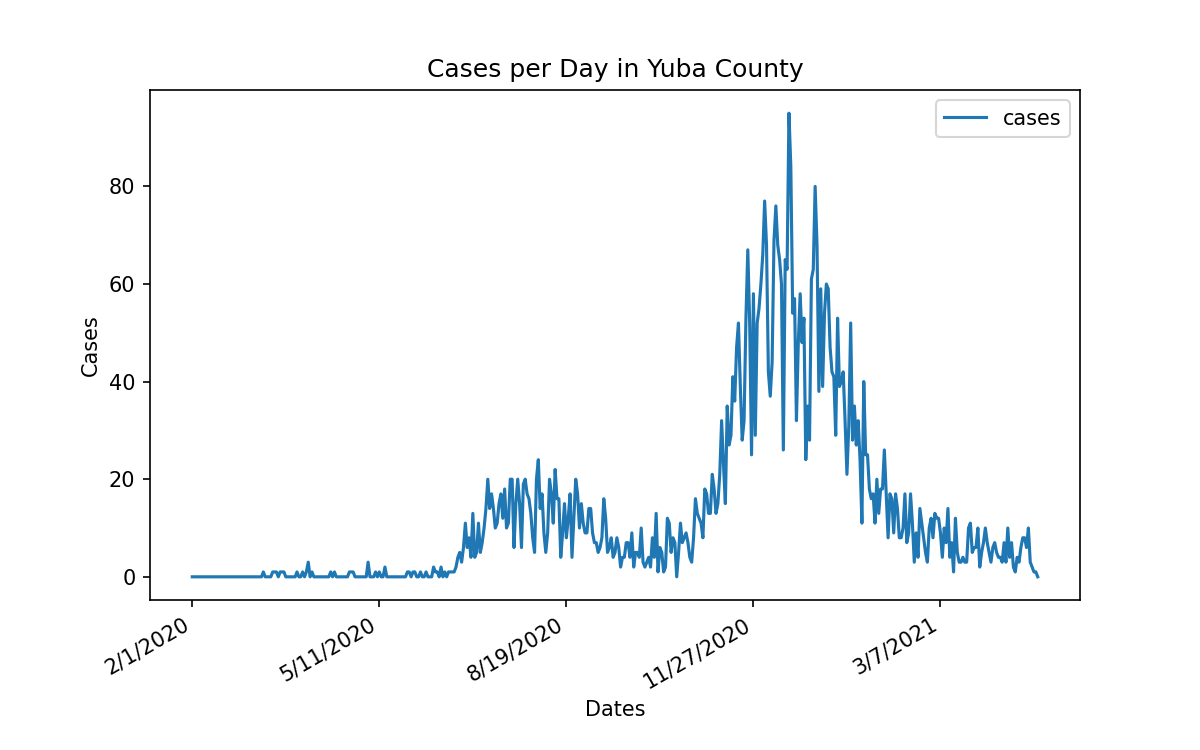

In [53]:
# 
cases_plot = ca_counties_cases_df.plot('date', 'cases',kind="line", figsize=(8,5))
plt.title(f"Cases per Day in {county2} County")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.gcf().autofmt_xdate()
plt.show()



<IPython.core.display.Javascript object>


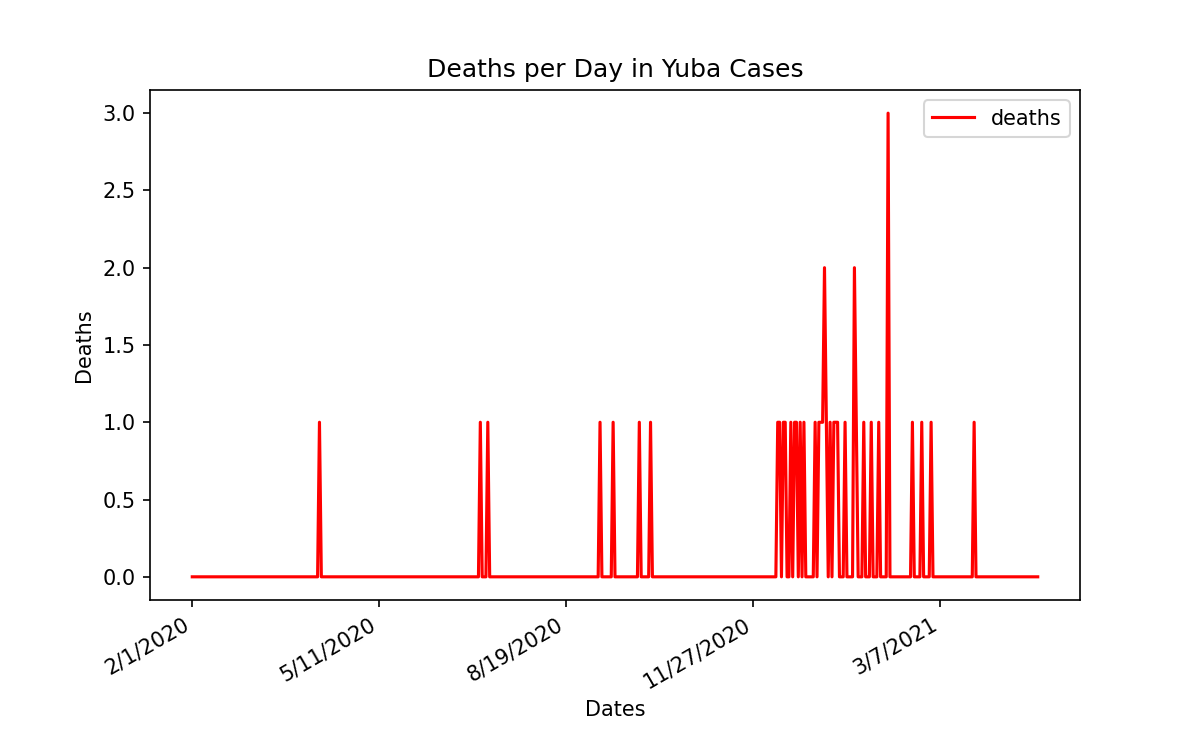

In [54]:
deaths_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line", color="red", figsize=(8,5))
plt.title(f"Deaths per Day in {county2} Cases")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


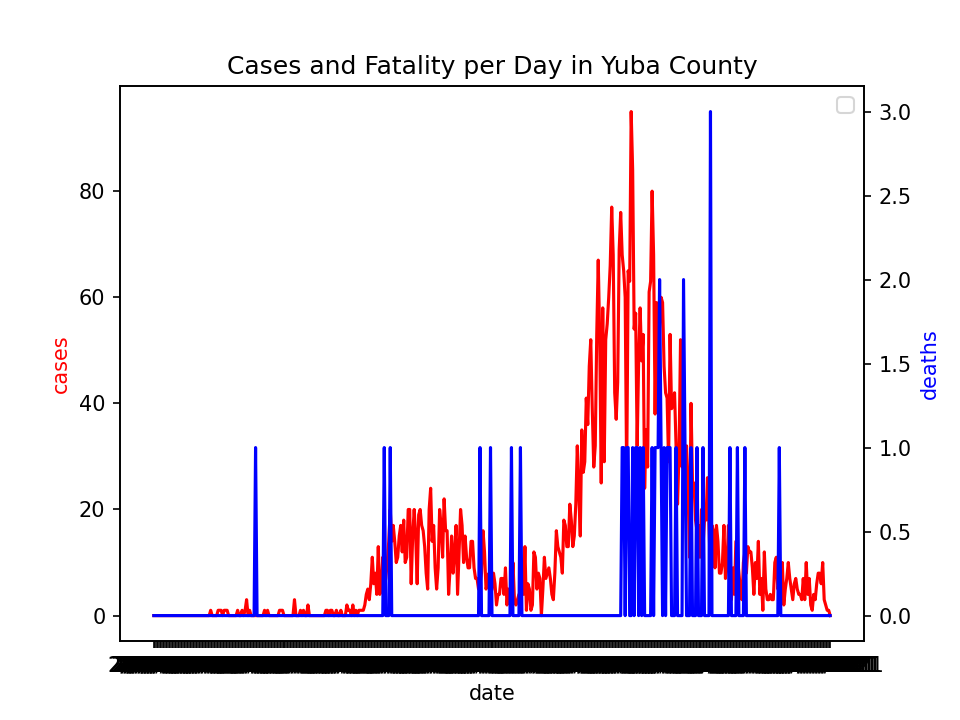

No handles with labels found to put in legend.


In [55]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_cases_df.date, ca_counties_cases_df["deaths"],color="blue")
ax2.set_ylabel("deaths",color="blue")



plt.title(f"Cases and Fatality per Day in {county2} County")
plt.legend()

plt.show()




<IPython.core.display.Javascript object>


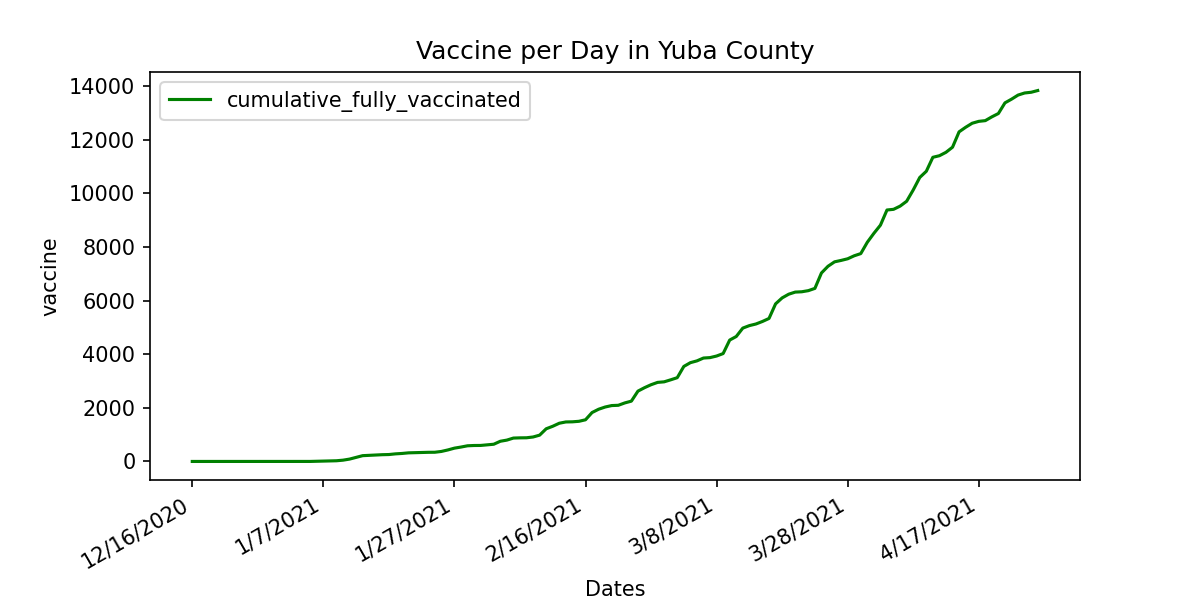

In [56]:

vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           'cumulative_fully_vaccinated',
                                           kind="line", color= "green", figsize=(8,4))
plt.title(f"Vaccine per Day in {county2} County")
plt.xlabel("Dates")
plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<IPython.core.display.Javascript object>


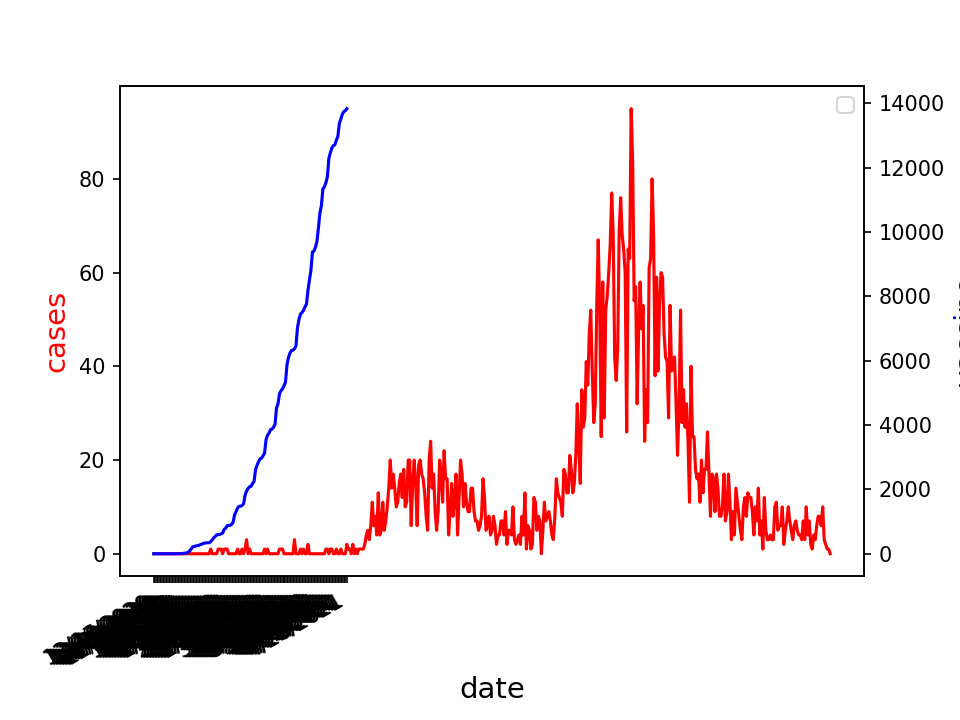

No handles with labels found to put in legend.


In [57]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ca_counties_cases_df.date, ca_counties_cases_df.cases, color="red")
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ca_counties_vaccine_df.administered_date, ca_counties_vaccine_df["cumulative_fully_vaccinated"],color="blue")
ax2.set_ylabel("vaccine",color="blue",fontsize=14)
plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()



<IPython.core.display.Javascript object>


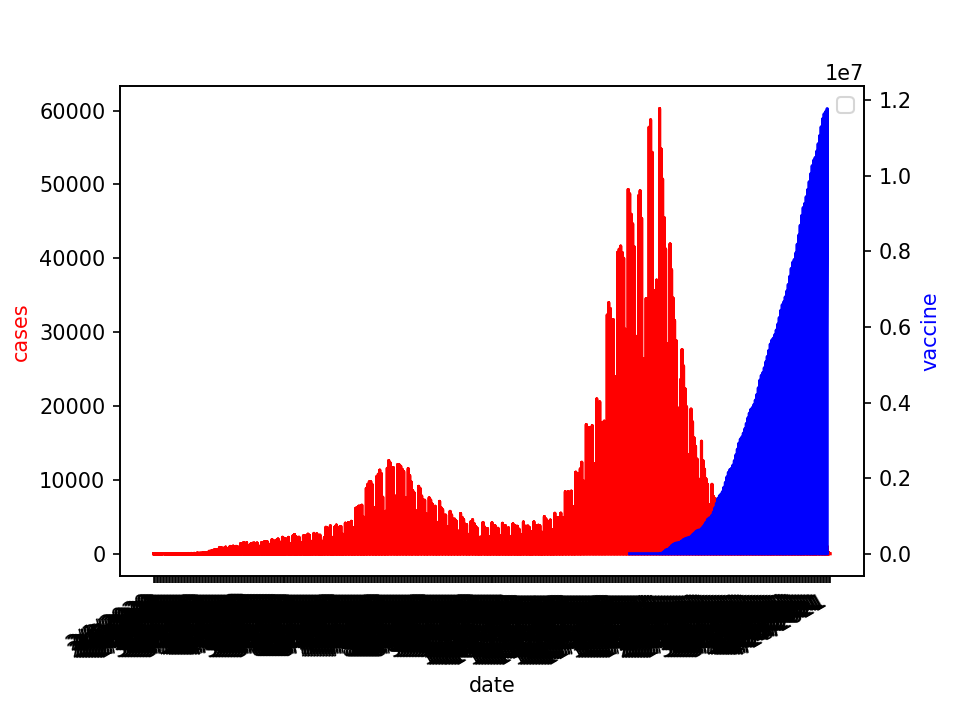

No handles with labels found to put in legend.


In [72]:
vaccine_data = vaccine_data.rename(columns={"administered_date": "date"})

merge_data = pd.merge(cases_data, vaccine_data, 
                   on='date', 
                   how='left')
  
# displaying result
merge_data

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merge_data.date, merge_data.cases, color="red")
# set x-axis label
ax.set_xlabel("date")
# set y-axis label
ax.set_ylabel("cases",color="red")


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merge_data.date, merge_data["cumulative_fully_vaccinated"],color="blue")
ax2.set_ylabel("vaccine",color="blue")
plt.show()



#vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           #'cumulative_fully_vaccinated',
                                          # kind="line", color= "green", figsize=(8,6))
#plt.title(f"vaccine per day in {county1}")
#plt.xlabel("Dates")
#plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


<IPython.core.display.Javascript object>


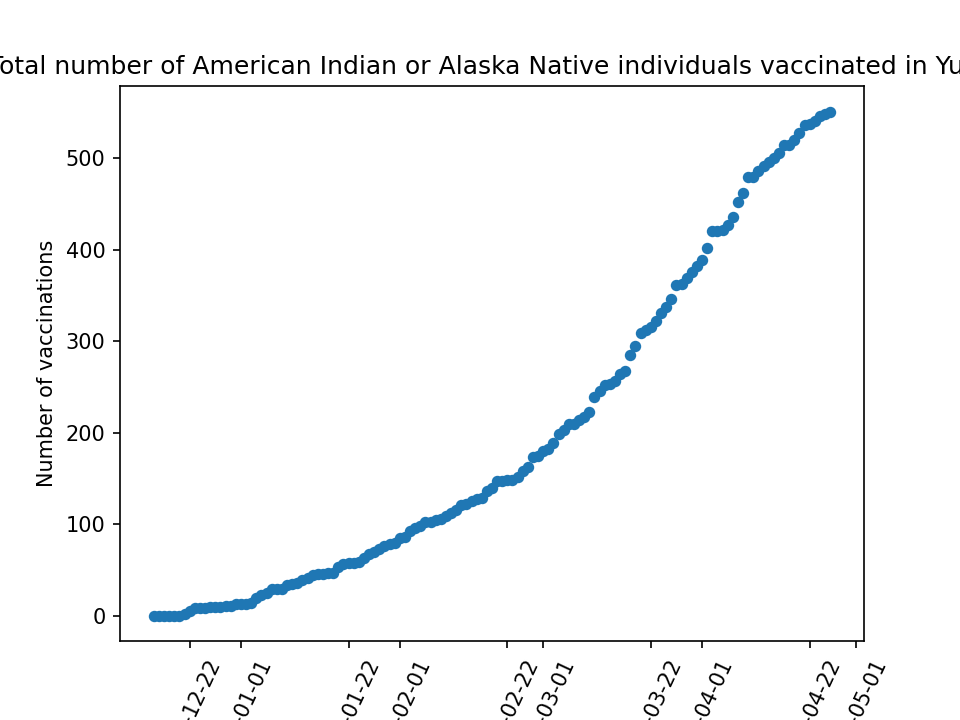

y = 4.37x + -96.43
The vaccination rate of the American Indian or Alaska Native demographic in Yuba county is about 4.370293100458064 people per day
0.1847904059390302 percent of the American Indian or Alaska Native population is vaccinated per day


In [73]:

xaxis = np.arange (1.0, 134.0, 1)

demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of American Indian or Alaska Native individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")


x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)



print (line_eq)
print (f"The vaccination rate of the American Indian or Alaska Native demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the American Indian or Alaska Native population is vaccinated per day")

plt.show()


piea = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


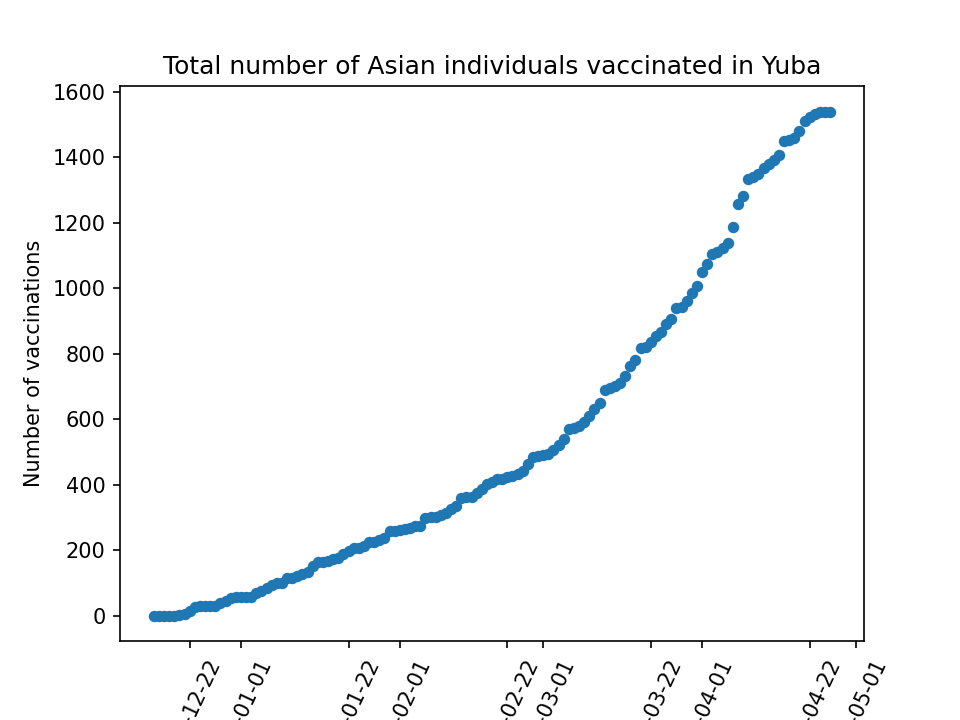

y = 11.8x + -243.47
The vaccination rate of the Asian demographic in Yuba county is about 11.804348047867293 people per day
0.21299797993264694 percent of the Asian population is vaccinated per day


In [74]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Asian"]
xaxis = np.arange (1.0, 134.0, 1)

demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Asian individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
#plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Asian demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Asian population is vaccinated per day")

pieb = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


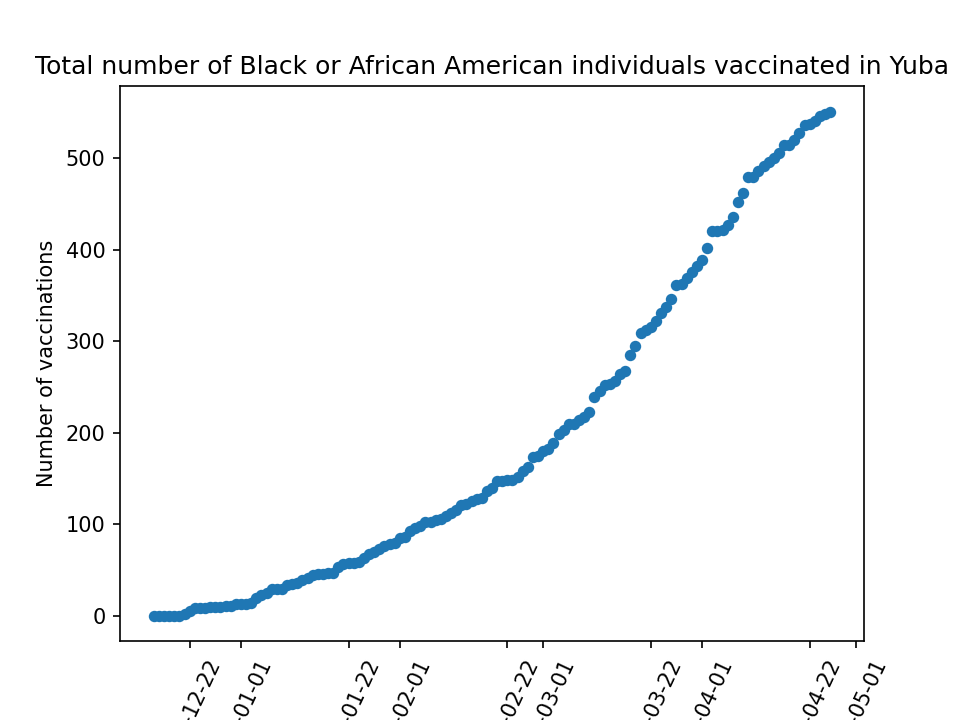

<IPython.core.display.Javascript object>


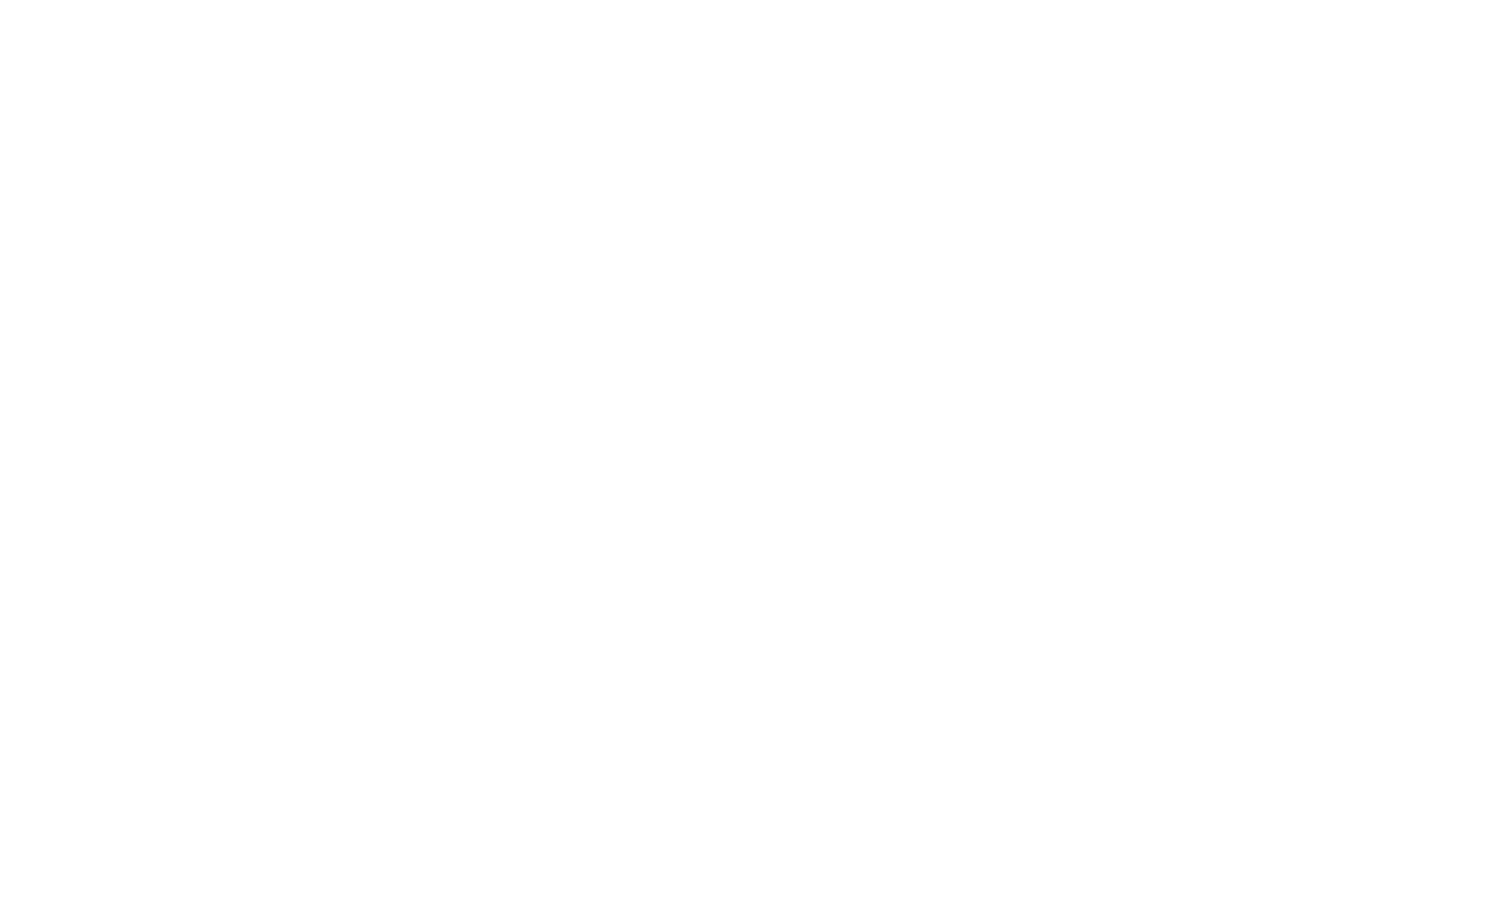

y = 4.37x + -96.43
The vaccination rate of the Black or African American demographic in Yuba county is about 4.370293100458064 people per day
0.1847904059390302 percent of the Black or African American population is vaccinated per day


In [75]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Black or African American"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Black or African American individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Black or African American demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Black or African American population is vaccinated per day")

piec = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


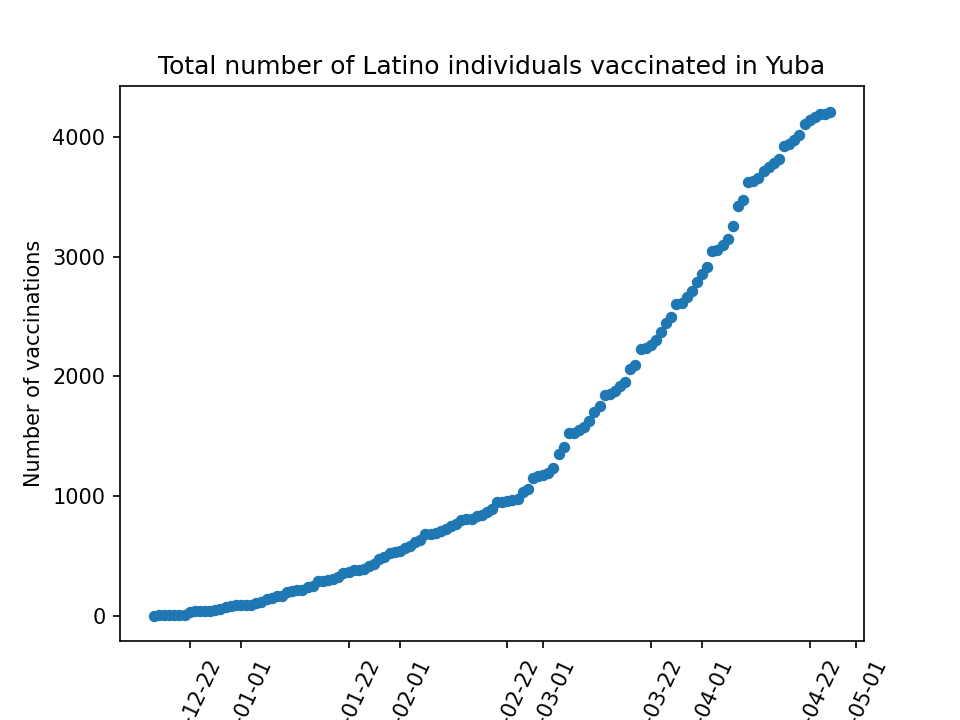

<IPython.core.display.Javascript object>


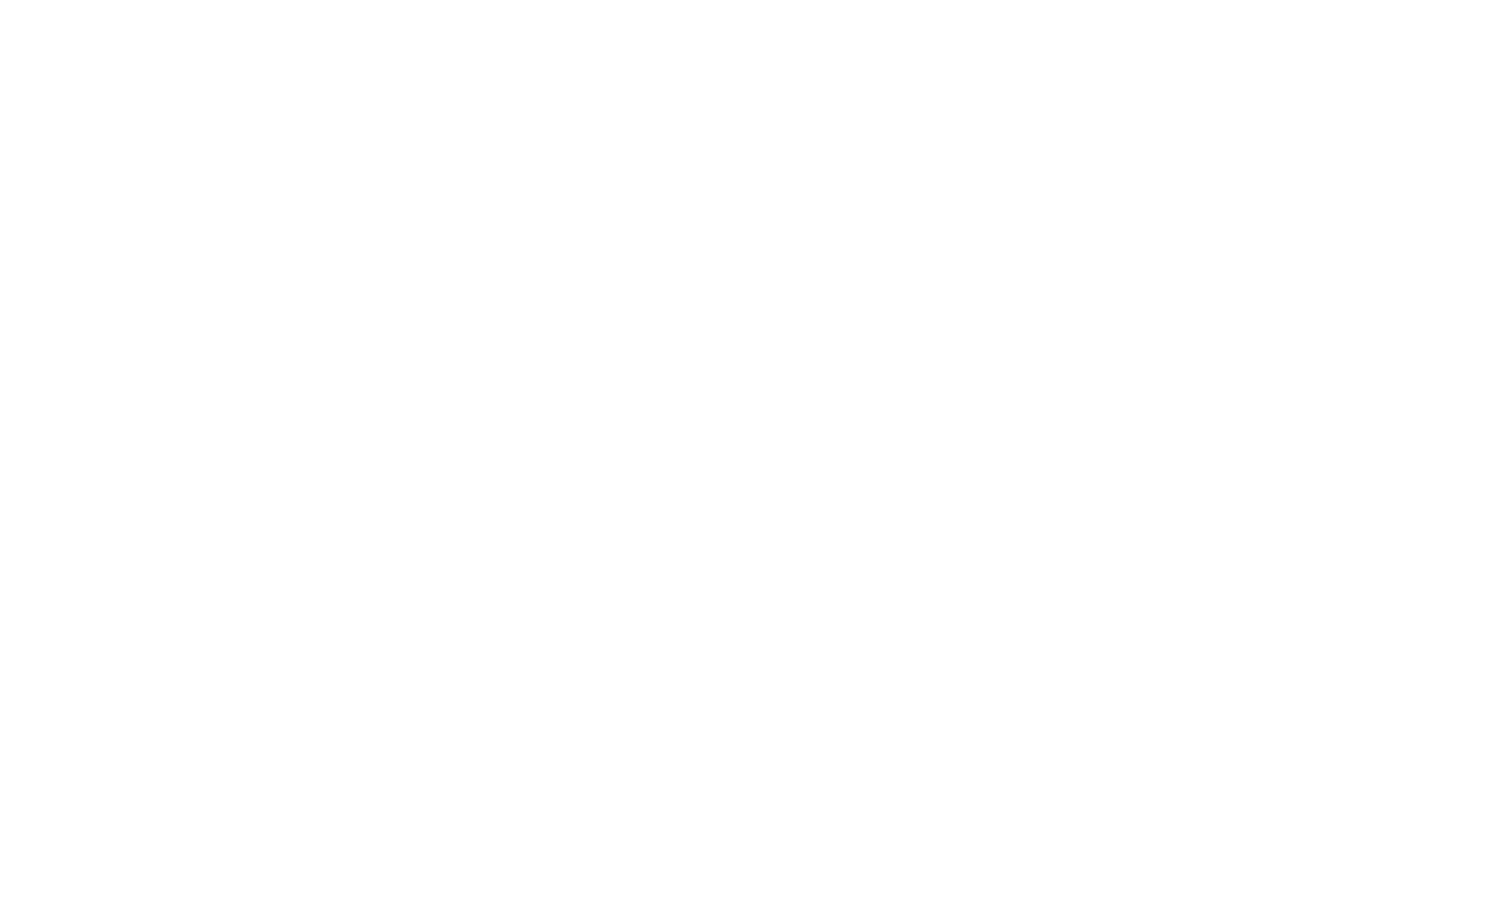

y = 33.02x + -797.11
The vaccination rate of the Latino demographic in Yuba county is about 33.02403566582671 people per day
0.15819897324946927 percent of the Latino population is vaccinated per day


In [76]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Latino"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Latino individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Latino demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Latino population is vaccinated per day")

pied = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


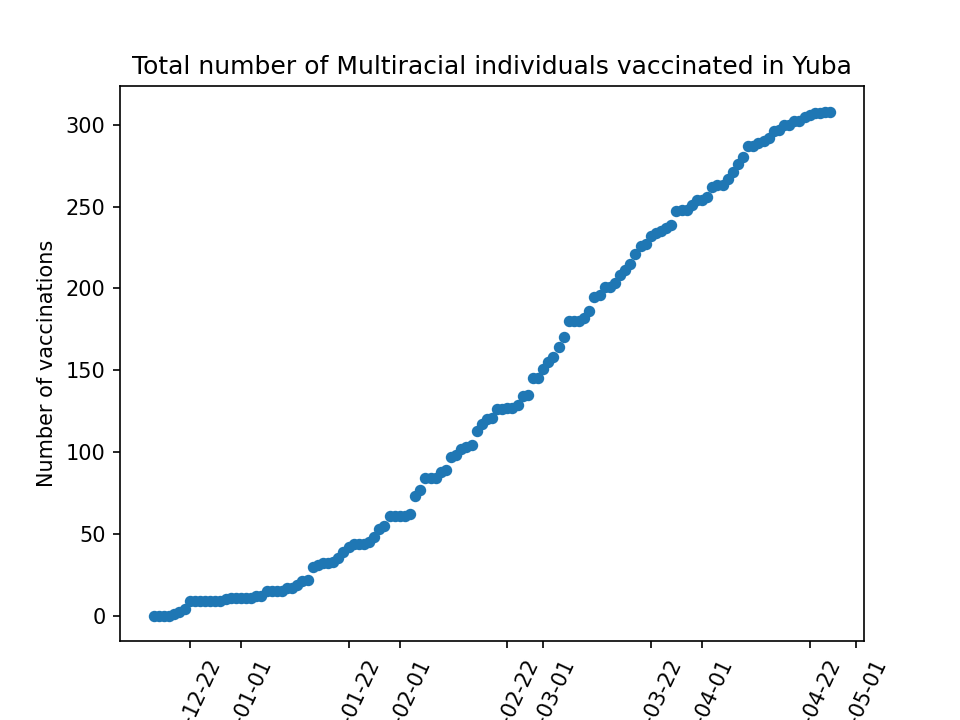

<IPython.core.display.Javascript object>


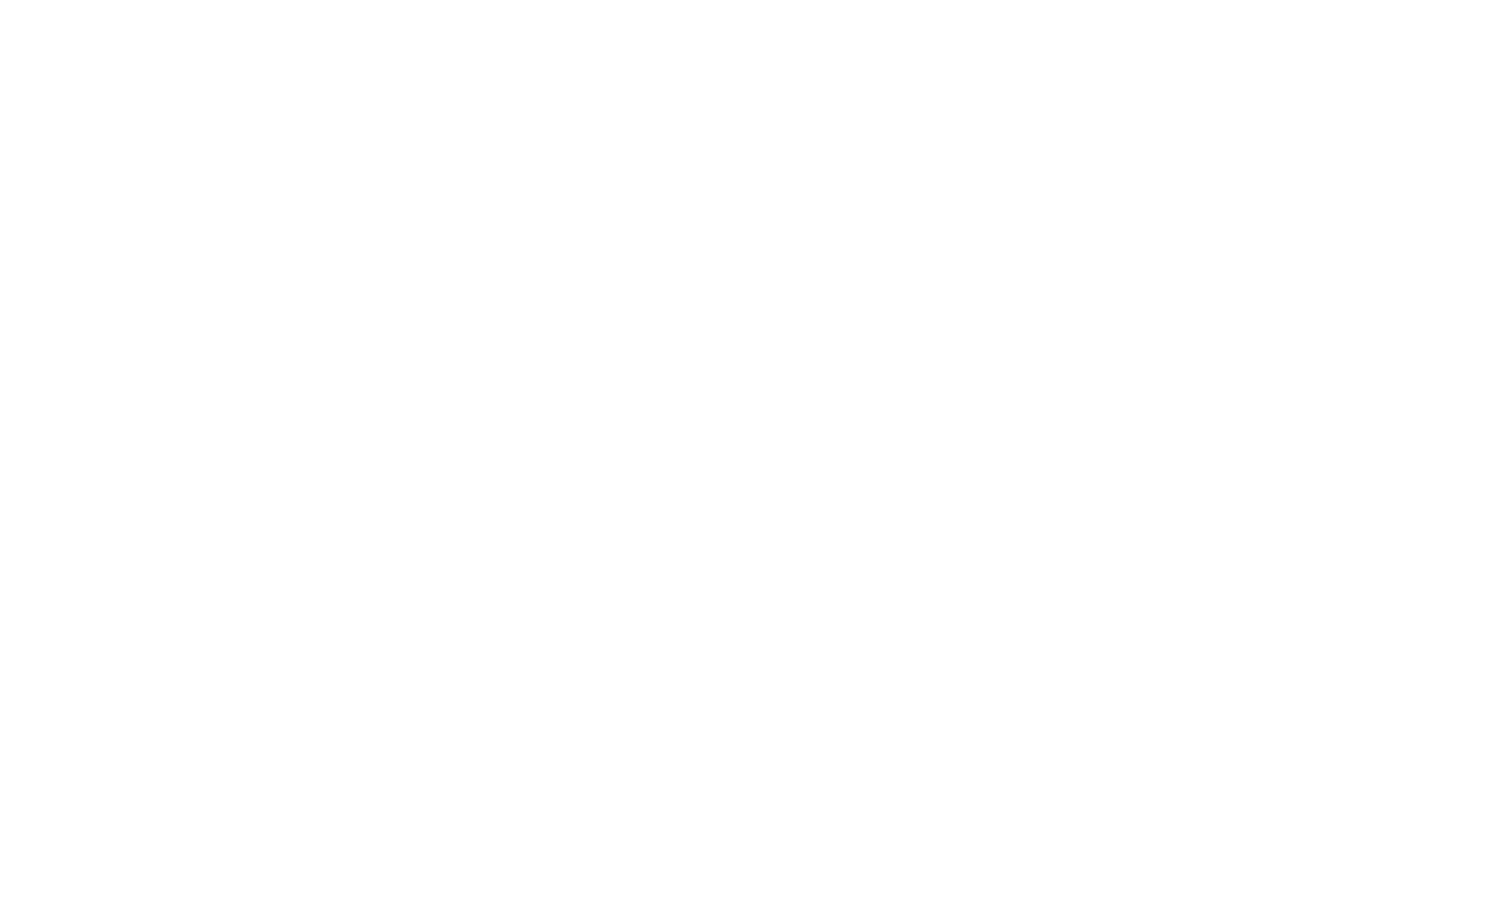

y = 2.71x + -47.23
The vaccination rate of the Multiracial demographic in Yuba county is about 2.7121280133848873 people per day
0.07361911002673419 percent of the Multiracial population is vaccinated per day


In [77]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Multiracial"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Multiracial individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Multiracial demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Multiracial population is vaccinated per day")

piee = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


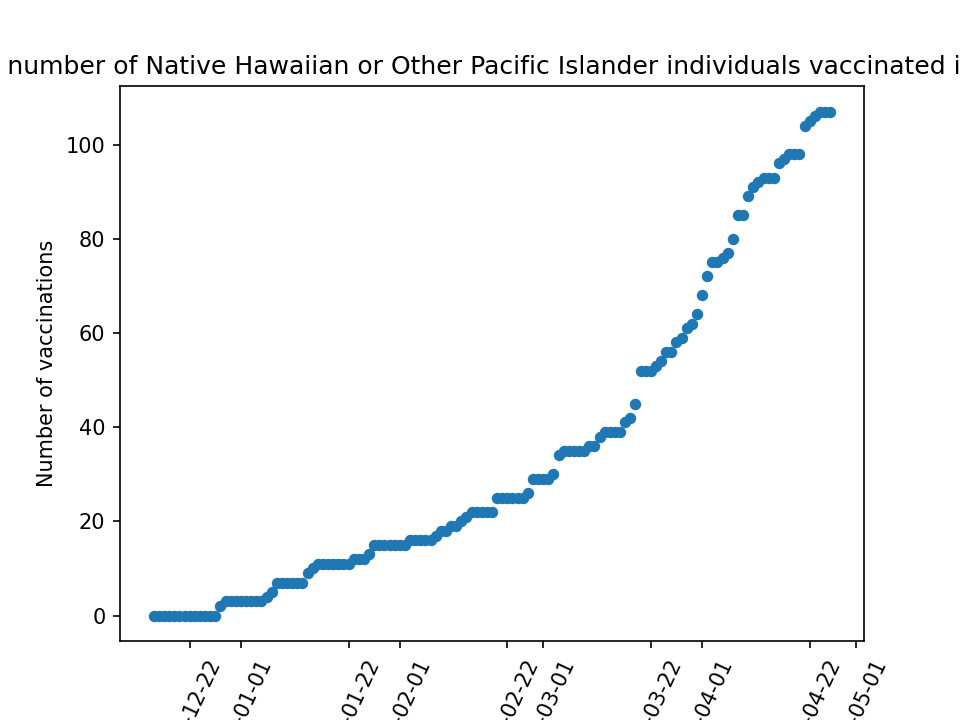

<IPython.core.display.Javascript object>


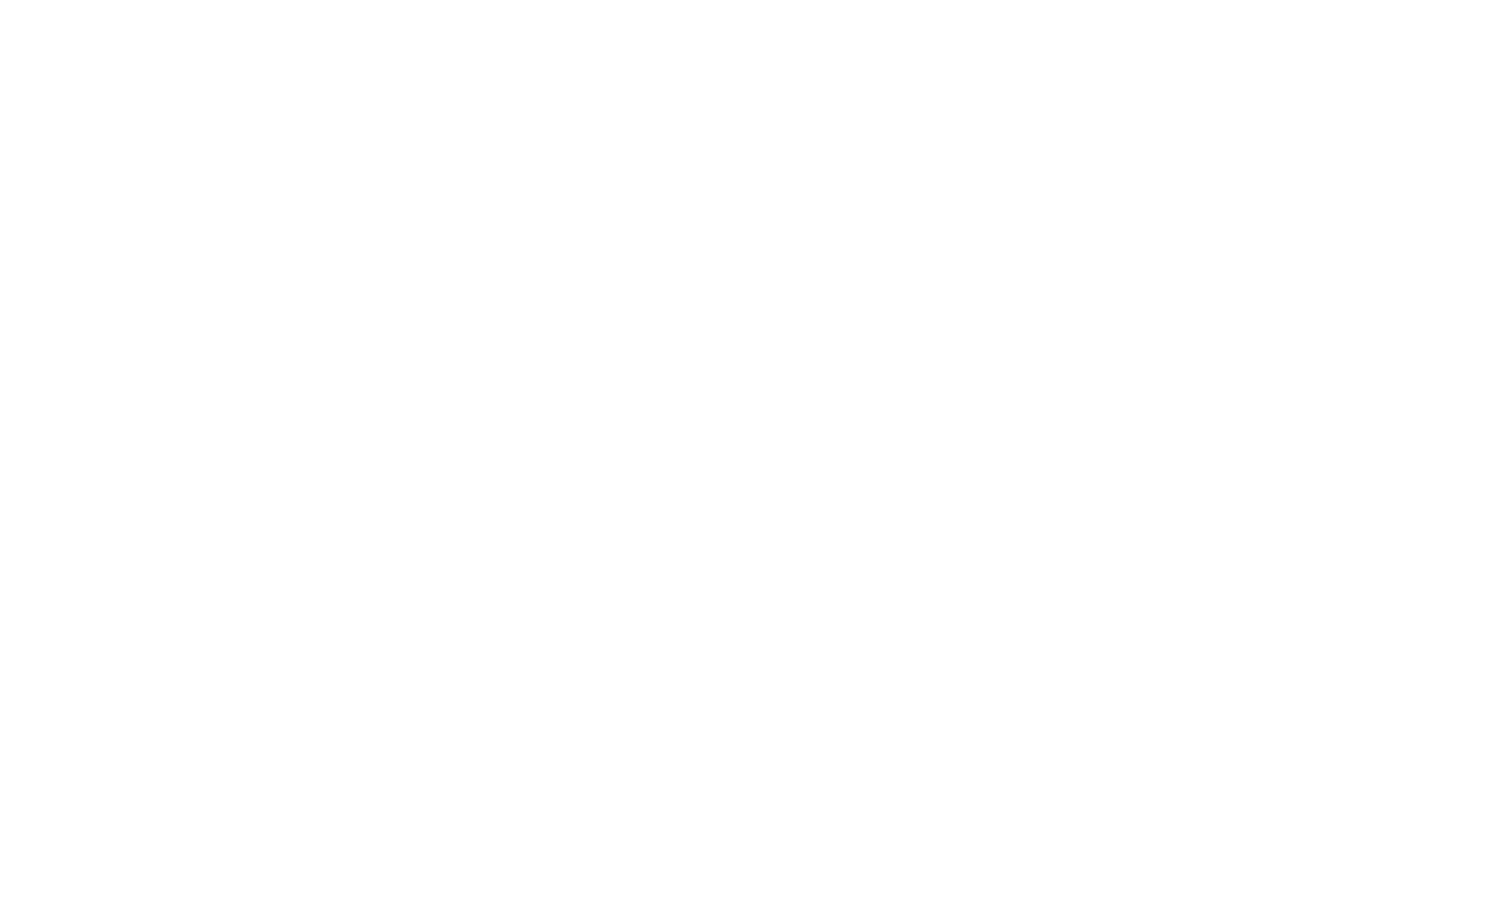

y = 0.79x + -18.28
The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in Yuba county is about 0.7912233092908663 people per day
0.28257975331816654 percent of the Native Hawaiian or Other Pacific Islander population is vaccinated per day


In [78]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Native Hawaiian or Other Pacific Islander"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Native Hawaiian or Other Pacific Islander individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the Native Hawaiian or Other Pacific Islander demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Native Hawaiian or Other Pacific Islander population is vaccinated per day")

pief = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


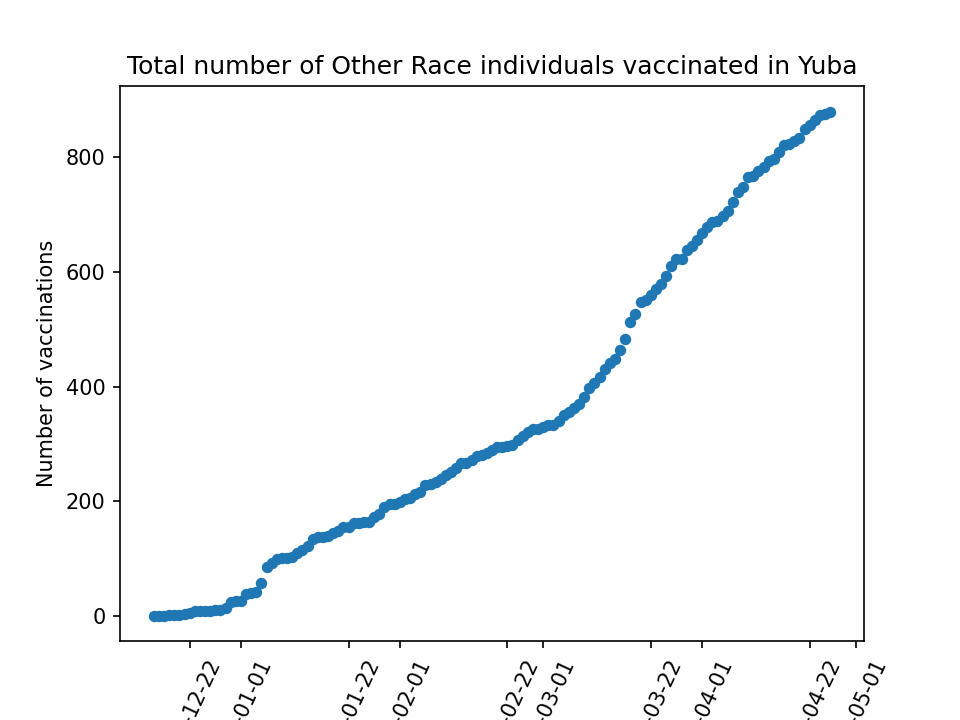

<IPython.core.display.Javascript object>


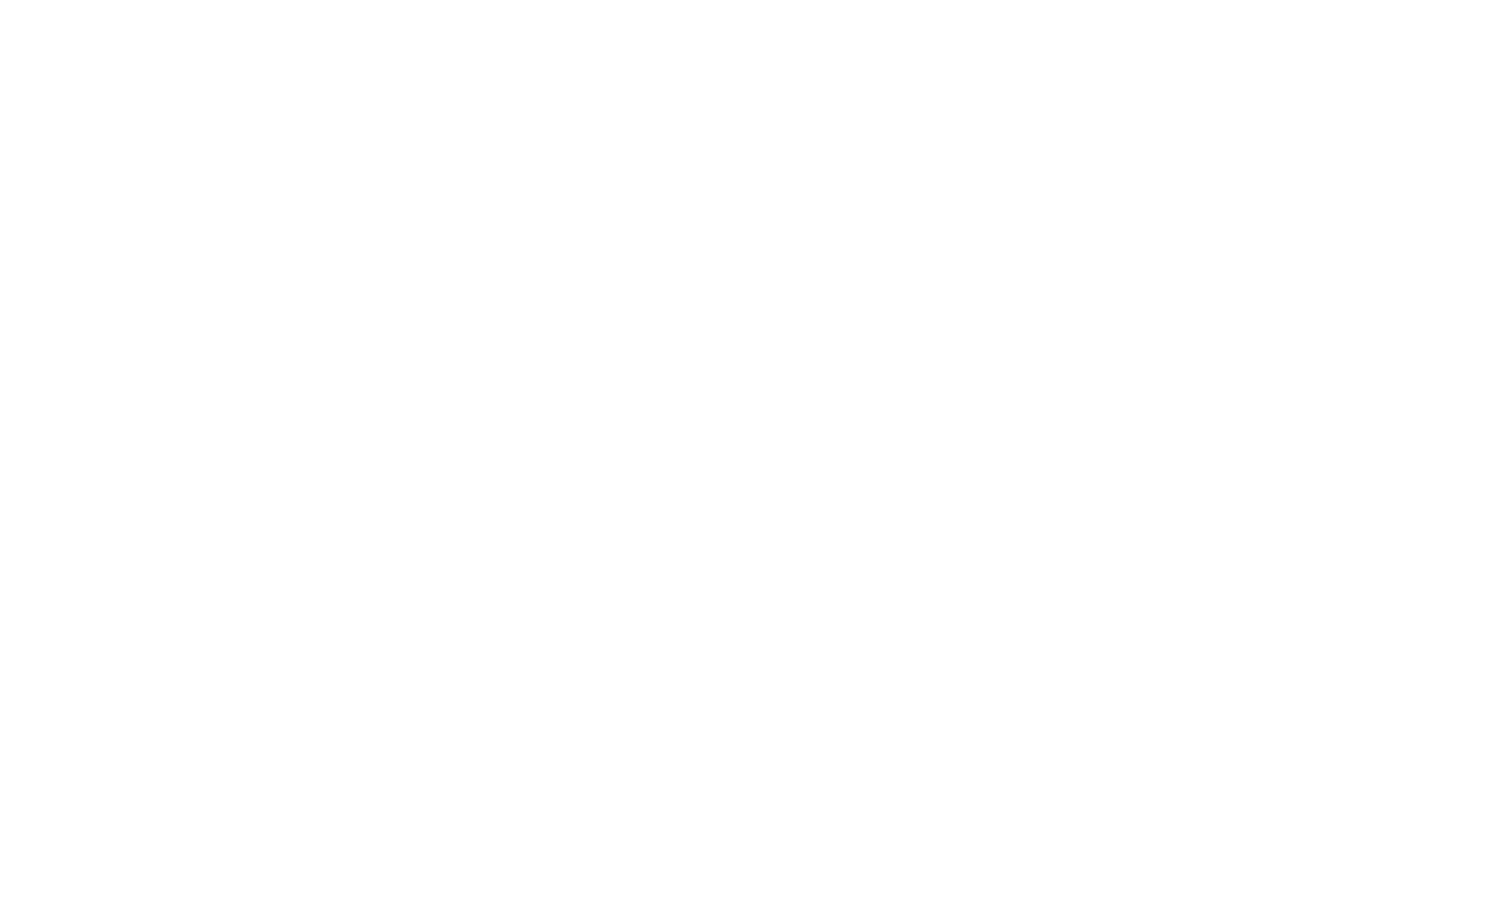

y = 6.9x + -112.1
The vaccination rate of the 'Other Race' demographic in Yuba county is about 6.903893043327451 people per day
nan percent of the Other Race population is vaccinated per day


In [84]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "Other Race"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of Other Race individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the 'Other Race' demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the Other Race population is vaccinated per day")

pieg = demo.iloc[-1, 12]

<IPython.core.display.Javascript object>


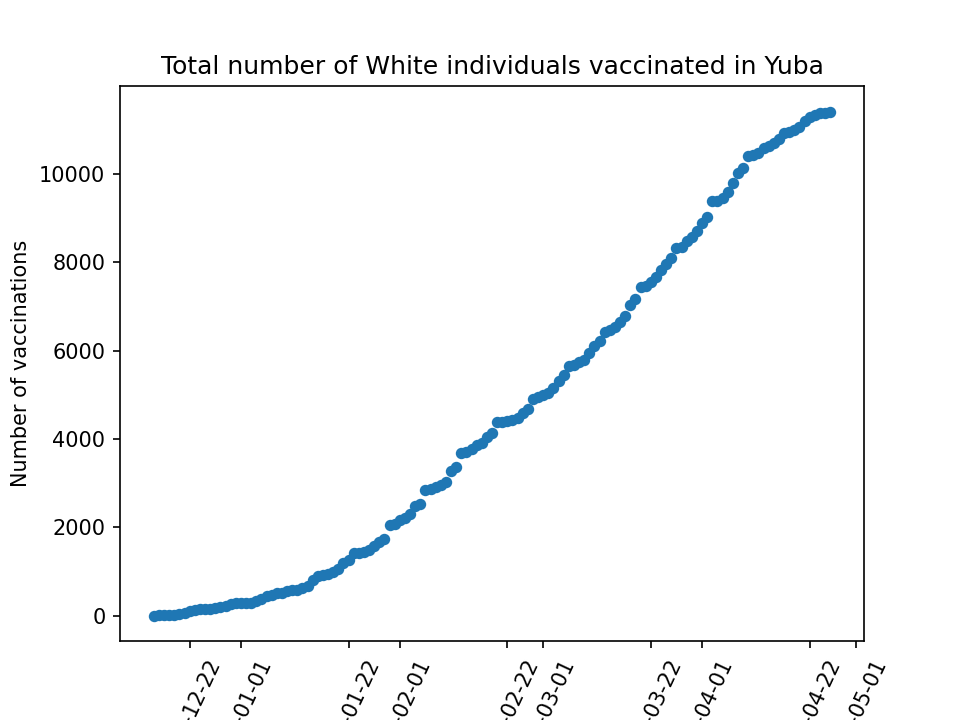

<IPython.core.display.Javascript object>


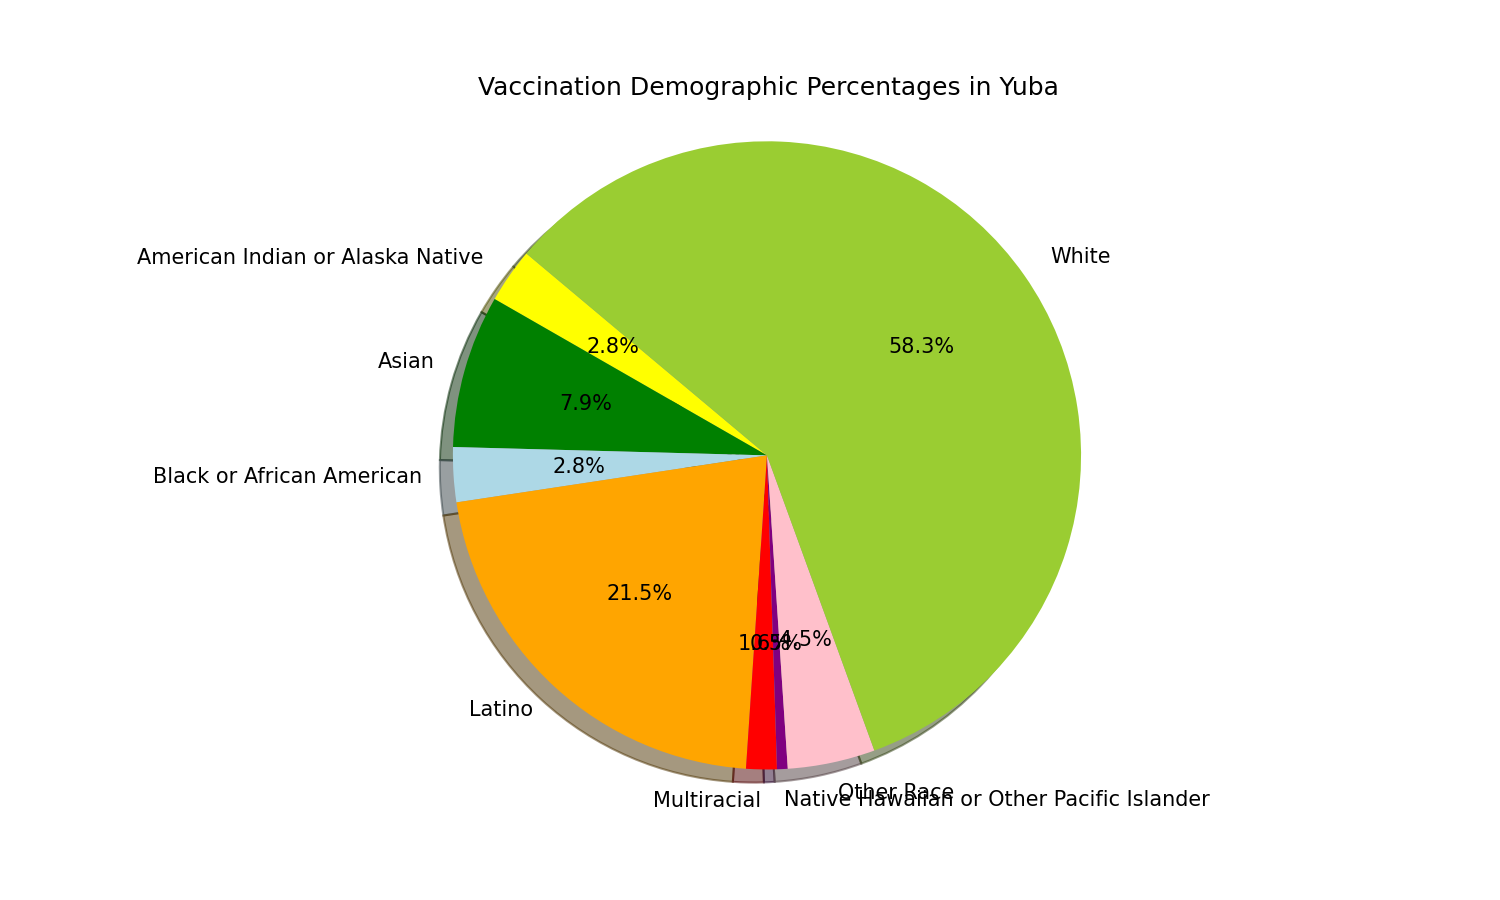

y = 97.08x + -1882.47
The vaccination rate of the White demographic in Yuba county is about 97.07789657318332 people per day
0.22008137967169197 percent of the White population is vaccinated per day


In [80]:
demo = county.loc[ca_counties_vaxdemo_df["demographic_value"]== "White"]
xaxis = np.arange (1.0, 134.0, 1)

cases_plot = demo.plot('administered_date', 'cumulative_at_least_one_dose',kind="scatter")
plt.title(f"Total number of White individuals vaccinated in {county2}")
plt.xlabel("Date")
plt.ylabel("Number of vaccinations")

x_values = xaxis
y_values = demo['cumulative_at_least_one_dose']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xticks(rotation = 65)
cases_plot= plt.figure(figsize=(10,6))


print (line_eq)
print (f"The vaccination rate of the White demographic in {county2} county is about {slope} people per day")
a = demo.iloc[0, 4]
b = ((slope) / (a))*100

print (f"{b} percent of the White population is vaccinated per day")

pieh = demo.iloc[-1, 12]

In [81]:
labels = ["American Indian or Alaska Native", "Asian", "Black or African American", "Latino", "Multiracial", "Native Hawaiian or Other Pacific Islander", "Other Race", "White"]
vaxnumbydemo = [piea, pieb, piec, pied, piee, pief, pieg, pieh]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,0,0,0)
plt.pie(vaxnumbydemo, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title(f"Vaccination Demographic Percentages in {county2}")
plt.show()

C:\Users\blogger\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


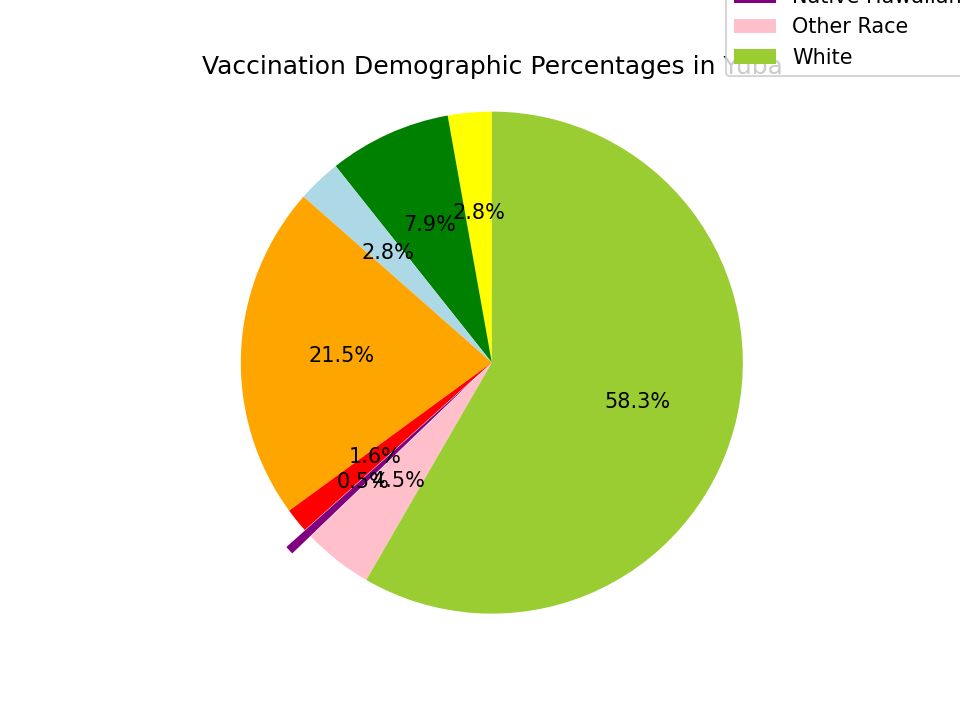

In [82]:
labels = ["American Indian or Alaska Native", "Asian", "Black or African American", "Latino", "Multiracial", "Native Hawaiian or Other Pacific Islander", "Other Race", "White"]
vaxnumbydemo = [piea, pieb, piec, pied, piee, pief, pieg, pieh]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0,0,0,0,0,.1,0,0)
fig1, ax1 = plt.subplots()
patches, texts, auto = ax1.pie(vaxnumbydemo, colors=colors, shadow=False, startangle=90,explode=explode, autopct='%1.1f%%' )
plt.axis("equal")
plt.title(f"Vaccination Demographic Percentages in {county2}")

plt.legend(patches, labels, bbox_to_anchor=(.8, 1))

plt.show()